<a href="https://colab.research.google.com/github/Anandarahmawati24/KecArtifisial/blob/main/Prak2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.075000000000003


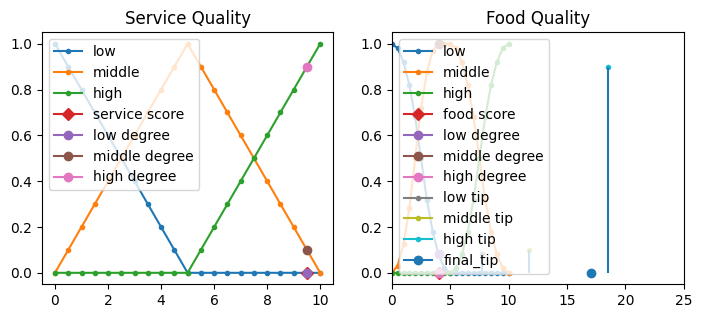

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#Problem: from service quality and food quality to tip amount
x_service = np.arange(0,10.01,0.5)
x_food = np.arange(0,10.01,0.5)
x_tip = np.arange(0,25.01,1.0)

#membership function
service_low = fuzz.trimf(x_service,[0,0,5])
service_medium = fuzz.trimf(x_service,[0,5,10])
service_high = fuzz.trimf(x_service,[5,10,10])

food_low = fuzz.zmf(x_food, 0,5)
food_medium = fuzz.pimf(x_food,0,4,5,10)
food_high = fuzz.smf(x_food,5,10)
#input service score and food score
service_score = 9.5
food_score = 4.0
service_low_degree = fuzz.interp_membership(x_service,service_low, service_score)
service_middle_degree = fuzz.interp_membership(x_service, service_medium, service_score)
service_high_degree = fuzz.interp_membership(x_service,service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food,food_low,food_score)
food_middle_degree = fuzz.interp_membership(x_food,food_medium,food_score)
food_high_degree = fuzz.interp_membership(x_food,food_high,food_score)

#whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 *fig_scale_x, 4.8 * fig_scale_y))
row = 2
col =3

plt.subplot(row,col,1)
plt.title('Service Quality')
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_medium, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(service_score, 0.0, label="service score", marker="D")
plt.plot(service_score, service_low_degree, label="low degree", marker="o")
plt.plot(service_score, service_middle_degree, label="middle degree", marker="o")
plt.plot(service_score, service_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row,col,2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_medium, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")
#============================================
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

# apply the equalition:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5.0 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final_tip", marker="o")
plt.legend(loc="upper left")


In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


313.9341257526698


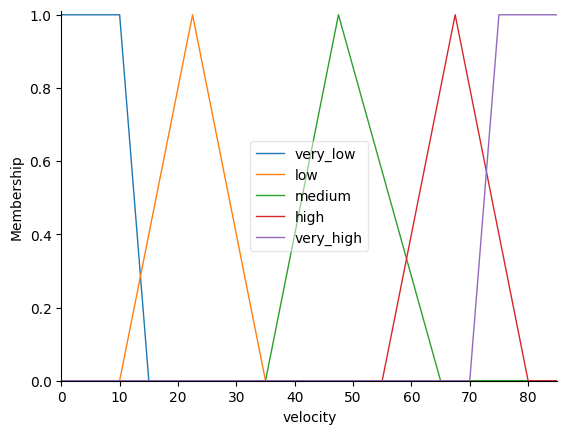

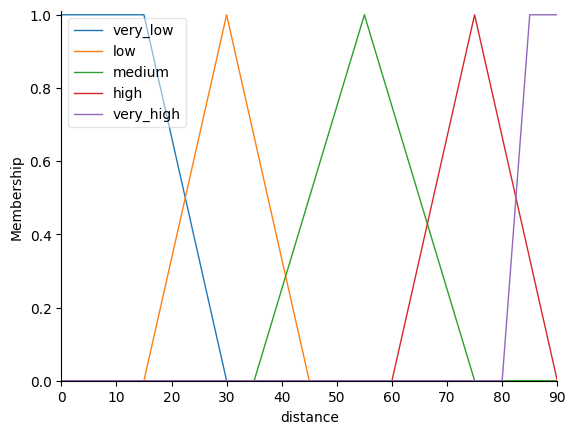

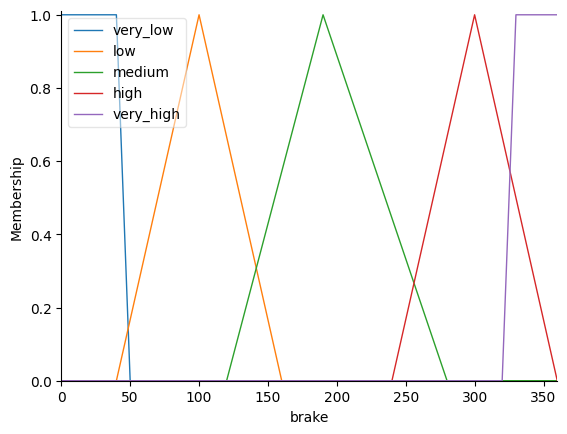

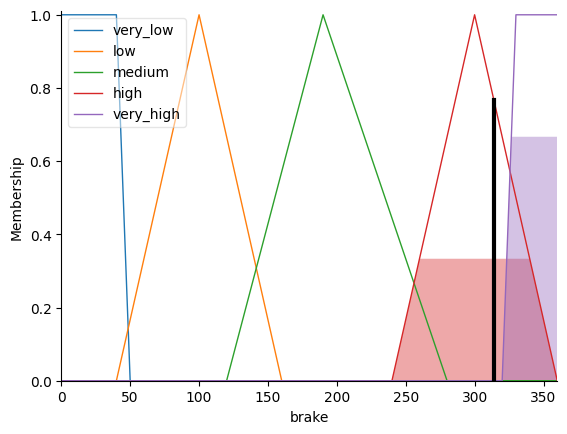

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# these universe of variables and membership functions
velocity = ctrl.Antecedent(np.arange(0, 85.5, 0.5), 'velocity')
distance = ctrl.Antecedent(np.arange(0, 90.5, 0.5), 'distance')
brake = ctrl.Consequent(np.arange(0, 360.5, 0.5), 'brake')

# rules
velocity['very_low'] = fuzz.trapmf(velocity.universe, [0,0,10,15])
velocity['low'] = fuzz.trimf(velocity.universe, [10, 22.5, 35])
velocity['medium'] = fuzz.trimf(velocity.universe, [35, 47.5, 65])
velocity['high'] = fuzz.trimf(velocity.universe, [55, 67.5, 80])
velocity['very_high'] = fuzz.trapmf(velocity.universe, [70, 75, 85, 85])

distance['very_low'] = fuzz.trapmf(distance.universe, [0,0,15,30])
distance['low'] = fuzz.trimf(distance.universe, [15, 30, 45])
distance['medium'] = fuzz.trimf(distance.universe, [35, 55, 75])
distance['high'] = fuzz.trimf(distance.universe, [60, 75, 90])
distance['very_high'] = fuzz.trapmf(distance.universe, [80, 85, 90, 90])

brake['very_low'] = fuzz.trapmf(brake.universe, [0,0,40,50])
brake['low'] = fuzz.trimf(brake.universe, [40, 100, 160])
brake['medium'] = fuzz.trimf(brake.universe, [120, 190, 280])
brake['high'] = fuzz.trimf(brake.universe, [240, 300, 360])
brake['very_high'] = fuzz.trapmf(brake.universe, [320, 330, 360, 360])

velocity.view()
distance.view()
brake.view()

rule1 = ctrl.Rule(velocity['very_low'] & distance['very_low'], brake['medium'])
rule2 = ctrl.Rule(velocity['very_low'] & distance['low'], brake['low'])
rule3 = ctrl.Rule(velocity['very_low'] & distance['medium'], brake['low'])
rule4 = ctrl.Rule(velocity['very_low'] & distance['high'], brake['very_low'])
rule5 = ctrl.Rule(velocity['very_low'] & distance['very_high'], brake['very_low'])

rule6 = ctrl.Rule(velocity['low'] & distance['very_low'], brake['high'])
rule7 = ctrl.Rule(velocity['low'] & distance['low'], brake['medium'])
rule8 = ctrl.Rule(velocity['low'] & distance['medium'], brake['low'])
rule9 = ctrl.Rule(velocity['low'] & distance['high'], brake['very_low'])
rule10 = ctrl.Rule(velocity['low'] & distance['very_high'], brake['very_low'])

rule11 = ctrl.Rule(velocity['medium'] & distance['very_low'], brake['very_high'])
rule12 = ctrl.Rule(velocity['medium'] & distance['low'], brake['high'])
rule13 = ctrl.Rule(velocity['medium'] & distance['medium'], brake['medium'])
rule14 = ctrl.Rule(velocity['medium'] & distance['high'], brake['low'])
rule15 = ctrl.Rule(velocity['medium'] & distance['very_high'], brake['very_low'])

rule16 = ctrl.Rule(velocity['high'] & distance['very_low'], brake['very_high'])
rule17 = ctrl.Rule(velocity['high'] & distance['low'], brake['high'])
rule18 = ctrl.Rule(velocity['high'] & distance['medium'], brake['high'])
rule19 = ctrl.Rule(velocity['high'] & distance['high'], brake['medium'])
rule20 = ctrl.Rule(velocity['high'] & distance['very_high'], brake['low'])

rule21 = ctrl.Rule(velocity['very_high'] & distance['very_low'], brake['very_high'])
rule22 = ctrl.Rule(velocity['very_high'] & distance['low'], brake['very_high'])
rule23 = ctrl.Rule(velocity['very_high'] & distance['medium'], brake['high'])
rule24 = ctrl.Rule(velocity['very_high'] & distance['high'], brake['medium'])
rule25 = ctrl.Rule(velocity['very_high'] & distance['very_high'], brake['low'])

brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                 rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

braking = ctrl.ControlSystemSimulation(brake_ctrl)
braking.input['velocity'] = 70
braking.input['distance'] = 20
braking.compute()
print(braking.output['brake'])
brake.view(sim=braking)
plt.show()


Tingkat kemacetan: 71.06


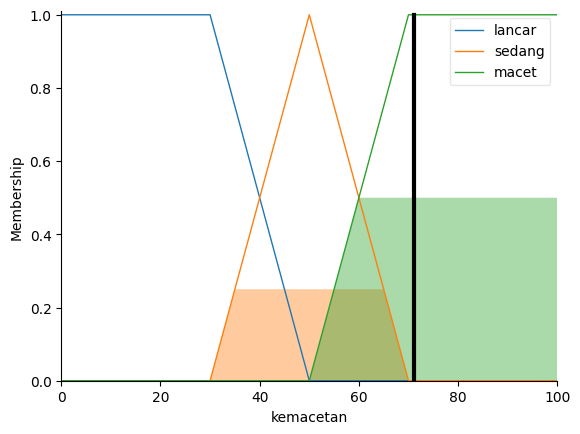

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# membuat Variabel Fuzzy
jumlah_kendaraan = ctrl.Antecedent(np.arange(10, 101, 1), 'jumlah_kendaraan')
kecepatan = ctrl.Antecedent(np.arange(5, 81, 1), 'kecepatan')
kemacetan = ctrl.Consequent(np.arange(0, 101, 1), 'kemacetan')

# Membership Function
jumlah_kendaraan['sedikit'] = fuzz.trapmf(jumlah_kendaraan.universe, [10, 10, 30, 50])
jumlah_kendaraan['sedang'] = fuzz.trimf(jumlah_kendaraan.universe, [30, 50, 70])
jumlah_kendaraan['banyak'] = fuzz.trapmf(jumlah_kendaraan.universe, [50, 70, 100, 100])

kecepatan['lambat'] = fuzz.trapmf(kecepatan.universe, [5, 5, 20, 40])
kecepatan['sedang'] = fuzz.trimf(kecepatan.universe, [20, 40, 60])
kecepatan['cepat'] = fuzz.trapmf(kecepatan.universe, [40, 60, 80, 80])

kemacetan['lancar'] = fuzz.trapmf(kemacetan.universe, [0, 0, 30, 50])
kemacetan['sedang'] = fuzz.trimf(kemacetan.universe, [30, 50, 70])
kemacetan['macet'] = fuzz.trapmf(kemacetan.universe, [50, 70, 100, 100])

# Aturan Fuzzy
rule1 = ctrl.Rule(jumlah_kendaraan['sedikit'] & kecepatan['cepat'], kemacetan['lancar'])
rule2 = ctrl.Rule(jumlah_kendaraan['sedikit'] & kecepatan['sedang'], kemacetan['lancar'])
rule3 = ctrl.Rule(jumlah_kendaraan['sedikit'] & kecepatan['lambat'], kemacetan['sedang'])
rule4 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['cepat'], kemacetan['lancar'])
rule5 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['sedang'], kemacetan['sedang'])
rule6 = ctrl.Rule(jumlah_kendaraan['sedang'] & kecepatan['lambat'], kemacetan['macet'])
rule7 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['cepat'], kemacetan['sedang'])
rule8 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['sedang'], kemacetan['macet'])
rule9 = ctrl.Rule(jumlah_kendaraan['banyak'] & kecepatan['lambat'], kemacetan['macet'])

kemacetan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
kemacetan_simulasi = ctrl.ControlSystemSimulation(kemacetan_ctrl)

kemacetan_simulasi.input['jumlah_kendaraan'] = 60
kemacetan_simulasi.input['kecepatan'] = 25
kemacetan_simulasi.compute()
hasil_kemacetan = kemacetan_simulasi.output['kemacetan']
print(f"Tingkat kemacetan: {hasil_kemacetan:.2f}")
kemacetan.view(sim=kemacetan_simulasi)
plt.show()
